# CNN Training with Keras
This script trains a Convolutional Neural Network (CNN) on the CIFAR-10 dataset using Keras. It includes hyperparameter analysis and saves the best model's weights.

In [39]:
# Import Required Libraries
import tensorflow as tf
import keras
from keras import layers
from keras import callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Data Preparation Function
def load_and_preprocess_data():
    (x_train_full, y_train_full), (x_test, y_test) = keras.datasets.cifar10.load_data()

    # Split training into train and validation (40k train, 10k val)
    x_train, x_val, y_train, y_val = train_test_split(
        x_train_full, y_train_full, test_size=0.2, random_state=42 # 0.2 of 50k is 10k for validation
    )

    # Normalize pixel values to be between 0 and 1
    x_train = x_train.astype("float32") / 255.0
    x_val = x_val.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

    print(f"x_train shape: {x_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"x_val shape: {x_val.shape}")
    print(f"y_val shape: {y_val.shape}")
    print(f"x_test shape: {x_test.shape}")
    print(f"y_test shape: {y_test.shape}")

    return (x_train, y_train), (x_val, y_val), (x_test, y_test)

In [41]:
# CNN Model Building Function
def build_cnn_model(num_conv_layers, filters_per_layer, filter_size, pooling_type, input_shape, num_classes=10):
    model = keras.Sequential()
    model.add(keras.Input(shape=input_shape))

    # Add Convolutional and Pooling layers
    for i in range(num_conv_layers):
        model.add(layers.Conv2D(filters_per_layer[i], filter_size, activation='relu', padding='same'))
        if pooling_type == 'max':
            model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        elif pooling_type == 'avg':
            model.add(layers.AveragePooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu')) # Example dense layer
    model.add(layers.Dense(num_classes, activation='softmax')) # Output layer

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [42]:
# Setup: Load data and define configs
(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_and_preprocess_data()
input_shape = x_train.shape[1:]
num_classes = 10
results = []
best_f1_score = -1
best_model_config = None
best_keras_model = None

# Define early stopping callback for hyperparameter search
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop if no improvement for 5 epochs
    restore_best_weights=True,
    verbose=1
)

hyperparameter_configs = [
    # Vary number of convolutional layers (3 variations)
    {'num_conv_layers': 1, 'filters_per_layer': [32], 'filter_size': (3,3), 'pooling_type': 'max'},
    {'num_conv_layers': 2, 'filters_per_layer': [32, 32], 'filter_size': (3,3), 'pooling_type': 'max'},
    {'num_conv_layers': 3, 'filters_per_layer': [32, 32, 32], 'filter_size': (3,3), 'pooling_type': 'max'},

    # Vary number of filters per layer (3 variations)
    {'num_conv_layers': 2, 'filters_per_layer': [16, 32], 'filter_size': (3,3), 'pooling_type': 'max'},
    {'num_conv_layers': 2, 'filters_per_layer': [32, 64], 'filter_size': (3,3), 'pooling_type': 'max'},
    {'num_conv_layers': 2, 'filters_per_layer': [64, 128], 'filter_size': (3,3), 'pooling_type': 'max'},

    # Vary filter size (3 variations)
    {'num_conv_layers': 2, 'filters_per_layer': [32, 32], 'filter_size': (3,3), 'pooling_type': 'max'},
    {'num_conv_layers': 2, 'filters_per_layer': [32, 32], 'filter_size': (5,5), 'pooling_type': 'max'},
    {'num_conv_layers': 2, 'filters_per_layer': [32, 32], 'filter_size': (7,7), 'pooling_type': 'max'},

    # Vary pooling type (2 variations)
    {'num_conv_layers': 2, 'filters_per_layer': [32, 32], 'filter_size': (3,3), 'pooling_type': 'max'},
    {'num_conv_layers': 2, 'filters_per_layer': [32, 32], 'filter_size': (3,3), 'pooling_type': 'avg'},
]

x_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 1)
x_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)



--- Training Model with Configuration 1: {'num_conv_layers': 1, 'filters_per_layer': [32], 'filter_size': (3, 3), 'pooling_type': 'max'} ---


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,050,890 (4.01 MB)

 Trainable params: 1,050,890 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3738 - loss: 1.7573 - val_accuracy: 0.5438 - val_loss: 1.2927
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3738 - loss: 1.7573 - val_accuracy: 0.5438 - val_loss: 1.2927
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5573 - loss: 1.2754 - val_accuracy: 0.5691 - val_loss: 1.2605
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5573 - loss: 1.2754 - val_accuracy: 0.5691 - val_loss: 1.2605
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5652 - loss: 1.2641 - val_accuracy: 0.5066 - val_loss: 1.5256
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5652 - loss: 1.2641 - val_accuracy: 0.5066 - val_loss: 1.5256
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5361 - loss: 1.4335 - val_accuracy: 0.4762 - val_loss: 1.8256
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5361 - loss:

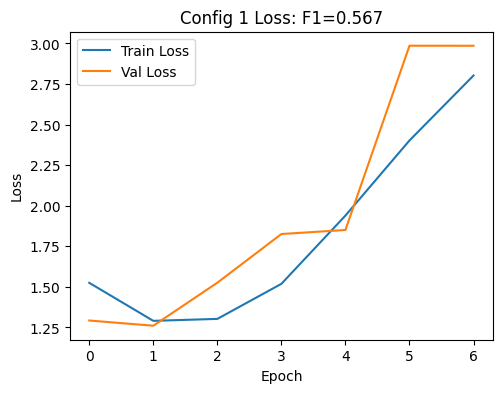

New best model found with F1-score: 0.5674


In [43]:
# Config 1
config = hyperparameter_configs[0]
print(f"\n--- Training Model with Configuration 1: {config} ---")
model = build_cnn_model(**config, input_shape=input_shape, num_classes=num_classes)
model.summary()
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping], verbose=1)
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Config 1 - Test Macro F1-Score: {macro_f1:.4f}")
results.append({'config': config, 'history': history.history, 'macro_f1': macro_f1})
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f"Config 1 Loss: F1={macro_f1:.3f}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
if macro_f1 > best_f1_score:
    best_f1_score = macro_f1
    best_model_config = config
    best_keras_model = model
    print(f"New best model found with F1-score: {best_f1_score:.4f}")


--- Training Model with Configuration 2: {'num_conv_layers': 2, 'filters_per_layer': [32, 32], 'filter_size': (3, 3), 'pooling_type': 'max'} ---


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273,706 (1.04 MB)

 Trainable params: 273,706 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3854 - loss: 1.6899 - val_accuracy: 0.5759 - val_loss: 1.2166
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3854 - loss: 1.6899 - val_accuracy: 0.5759 - val_loss: 1.2166
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5905 - loss: 1.1667 - val_accuracy: 0.6101 - val_loss: 1.1363
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5905 - loss: 1.1667 - val_accuracy: 0.6101 - val_loss: 1.1363
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.6343 - loss: 1.0678 - val_accuracy: 0.6001 - val_loss: 1.2203
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.6343 - loss: 1.0678 - val_accuracy: 0.6001 - val_loss: 1.2203
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6194 - loss: 1.1927 - val_accuracy: 0.5270 - val_loss: 1.9686
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6194 -

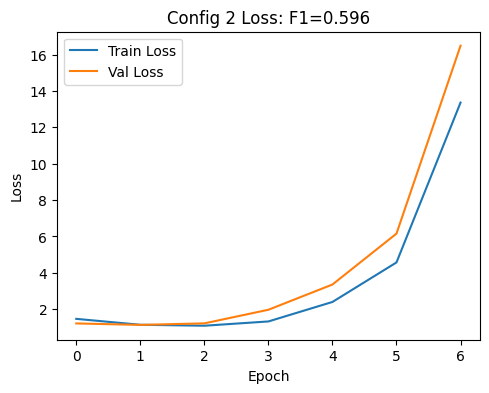

New best model found with F1-score: 0.5958


In [44]:
# Config 2
config = hyperparameter_configs[1]
print(f"\n--- Training Model with Configuration 2: {config} ---")
model = build_cnn_model(**config, input_shape=input_shape, num_classes=num_classes)
model.summary()
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping], verbose=1)
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Config 2 - Test Macro F1-Score: {macro_f1:.4f}")
results.append({'config': config, 'history': history.history, 'macro_f1': macro_f1})
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f"Config 2 Loss: F1={macro_f1:.3f}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
if macro_f1 > best_f1_score:
    best_f1_score = macro_f1
    best_model_config = config
    best_keras_model = model
    print(f"New best model found with F1-score: {best_f1_score:.4f}")


--- Training Model with Configuration 3: {'num_conv_layers': 3, 'filters_per_layer': [32, 32, 32], 'filter_size': (3, 3), 'pooling_type': 'max'} ---


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,346 (337.29 KB)

 Trainable params: 86,346 (337.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3515 - loss: 1.7710 - val_accuracy: 0.5281 - val_loss: 1.3284
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3515 - loss: 1.7710 - val_accuracy: 0.5281 - val_loss: 1.3284
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5506 - loss: 1.2696 - val_accuracy: 0.5895 - val_loss: 1.1620
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5506 - loss: 1.2696 - val_accuracy: 0.5895 - val_loss: 1.1620
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5740 - loss: 1.2477 - val_accuracy: 0.5254 - val_loss: 1.5341
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5740 - loss: 1.2477 - val_accuracy: 0.5254 - val_loss: 1.5341
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5253 - loss: 1.7106 - val_accuracy: 0.4867 - val_loss: 2.7661
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5253 -

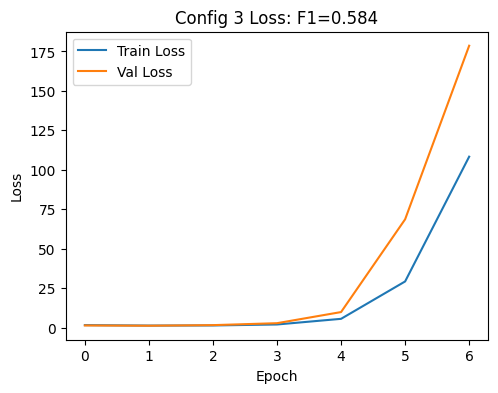

In [45]:
# Config 3
config = hyperparameter_configs[2]
print(f"\n--- Training Model with Configuration 3: {config} ---")
model = build_cnn_model(**config, input_shape=input_shape, num_classes=num_classes)
model.summary()
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping], verbose=1)
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Config 3 - Test Macro F1-Score: {macro_f1:.4f}")
results.append({'config': config, 'history': history.history, 'macro_f1': macro_f1})
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f"Config 3 Loss: F1={macro_f1:.3f}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
if macro_f1 > best_f1_score:
    best_f1_score = macro_f1
    best_model_config = config
    best_keras_model = model
    print(f"New best model found with F1-score: {best_f1_score:.4f}")


--- Training Model with Configuration 4: {'num_conv_layers': 2, 'filters_per_layer': [16, 32], 'filter_size': (3, 3), 'pooling_type': 'max'} ---


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,650 (1.02 MB)

 Trainable params: 268,650 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.3748 - loss: 1.7256 - val_accuracy: 0.5619 - val_loss: 1.2428
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.3748 - loss: 1.7256 - val_accuracy: 0.5619 - val_loss: 1.2428
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5732 - loss: 1.2043 - val_accuracy: 0.5760 - val_loss: 1.2017
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5732 - loss: 1.2043 - val_accuracy: 0.5760 - val_loss: 1.2017
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6052 - loss: 1.1381 - val_accuracy: 0.5966 - val_loss: 1.2142
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6052 - loss: 1.1381 - val_accuracy: 0.5966 - val_loss: 1.2142
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5943 - loss: 1.2801 - val_accuracy: 0.5176 - val_loss: 1.8338
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5943 -

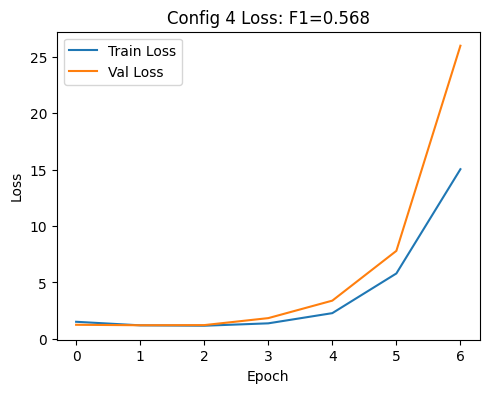

In [46]:
# Config 4
config = hyperparameter_configs[3]
print(f"\n--- Training Model with Configuration 4: {config} ---")
model = build_cnn_model(**config, input_shape=input_shape, num_classes=num_classes)
model.summary()
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping], verbose=1)
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Config 4 - Test Macro F1-Score: {macro_f1:.4f}")
results.append({'config': config, 'history': history.history, 'macro_f1': macro_f1})
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f"Config 4 Loss: F1={macro_f1:.3f}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
if macro_f1 > best_f1_score:
    best_f1_score = macro_f1
    best_model_config = config
    best_keras_model = model
    print(f"New best model found with F1-score: {best_f1_score:.4f}")


--- Training Model with Configuration 5: {'num_conv_layers': 2, 'filters_per_layer': [32, 64], 'filter_size': (3, 3), 'pooling_type': 'max'} ---


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.4002 - loss: 1.6770 - val_accuracy: 0.5292 - val_loss: 1.3282
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.4002 - loss: 1.6770 - val_accuracy: 0.5292 - val_loss: 1.3282
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5807 - loss: 1.1938 - val_accuracy: 0.5860 - val_loss: 1.2056
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5807 - loss: 1.1938 - val_accuracy: 0.5860 - val_loss: 1.2056
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5942 - loss: 1.2304 - val_accuracy: 0.5896 - val_loss: 1.3584
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5942 - loss: 1.2304 - val_accuracy: 0.5896 - val_loss: 1.3584
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5821 - loss: 1.4781 - val_accuracy: 0.5157 - val_loss: 2.5326
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5821 -

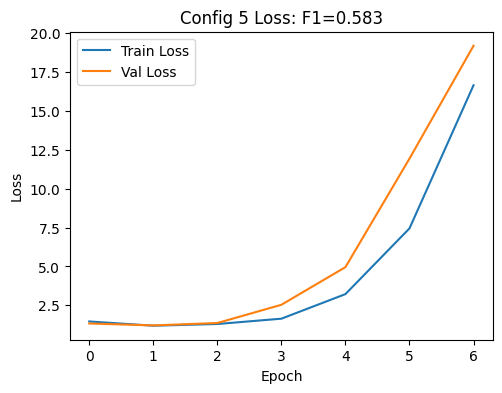

In [47]:
# Config 5
config = hyperparameter_configs[4]
print(f"\n--- Training Model with Configuration 5: {config} ---")
model = build_cnn_model(**config, input_shape=input_shape, num_classes=num_classes)
model.summary()
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping], verbose=1)
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Config 5 - Test Macro F1-Score: {macro_f1:.4f}")
results.append({'config': config, 'history': history.history, 'macro_f1': macro_f1})
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f"Config 5 Loss: F1={macro_f1:.3f}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
if macro_f1 > best_f1_score:
    best_f1_score = macro_f1
    best_model_config = config
    best_keras_model = model
    print(f"New best model found with F1-score: {best_f1_score:.4f}")


--- Training Model with Configuration 6: {'num_conv_layers': 2, 'filters_per_layer': [64, 128], 'filter_size': (3, 3), 'pooling_type': 'max'} ---


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125,642 (4.29 MB)

 Trainable params: 1,125,642 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.3768 - loss: 1.7137 - val_accuracy: 0.5417 - val_loss: 1.3328
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.3768 - loss: 1.7137 - val_accuracy: 0.5417 - val_loss: 1.3328
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5542 - loss: 1.3397 - val_accuracy: 0.5206 - val_loss: 1.7624
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5542 - loss: 1.3397 - val_accuracy: 0.5206 - val_loss: 1.7624
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.4530 - loss: 3.7984 - val_accuracy: 0.4324 - val_loss: 8.9833
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.4530 - loss: 3.7984 - val_accuracy: 0.4324 - val_loss: 8.9833
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3786 - loss: 16.1811 - val_accuracy: 0.3430 - val_loss: 40.2470
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3786

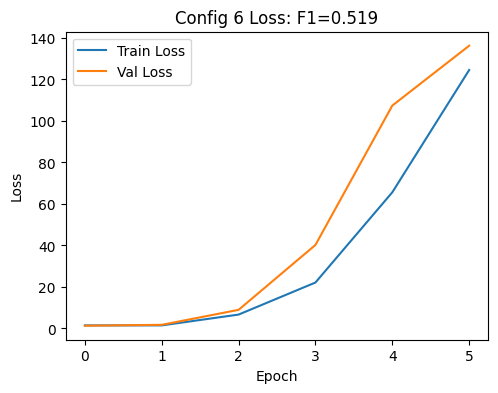

In [48]:
# Config 6
config = hyperparameter_configs[5]
print(f"\n--- Training Model with Configuration 6: {config} ---")
model = build_cnn_model(**config, input_shape=input_shape, num_classes=num_classes)
model.summary()
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping], verbose=1)
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Config 6 - Test Macro F1-Score: {macro_f1:.4f}")
results.append({'config': config, 'history': history.history, 'macro_f1': macro_f1})
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f"Config 6 Loss: F1={macro_f1:.3f}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
if macro_f1 > best_f1_score:
    best_f1_score = macro_f1
    best_model_config = config
    best_keras_model = model
    print(f"New best model found with F1-score: {best_f1_score:.4f}")


--- Training Model with Configuration 7: {'num_conv_layers': 2, 'filters_per_layer': [32, 32], 'filter_size': (3, 3), 'pooling_type': 'max'} ---


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273,706 (1.04 MB)

 Trainable params: 273,706 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.3913 - loss: 1.6850 - val_accuracy: 0.5648 - val_loss: 1.2216
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.3913 - loss: 1.6850 - val_accuracy: 0.5648 - val_loss: 1.2216
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5537 - loss: 1.3022 - val_accuracy: 0.5431 - val_loss: 1.4422
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5537 - loss: 1.3022 - val_accuracy: 0.5431 - val_loss: 1.4422
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5016 - loss: 2.1929 - val_accuracy: 0.4094 - val_loss: 6.9599
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5016 - loss: 2.1929 - val_accuracy: 0.4094 - val_loss: 6.9599
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3936 - loss: 10.5590 - val_accuracy: 0.3728 - val_loss: 23.7623
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3936

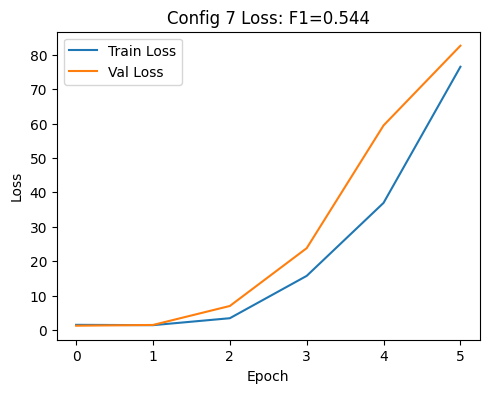

In [49]:
# Config 7
config = hyperparameter_configs[6]
print(f"\n--- Training Model with Configuration 7: {config} ---")
model = build_cnn_model(**config, input_shape=input_shape, num_classes=num_classes)
model.summary()
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping], verbose=1)
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Config 7 - Test Macro F1-Score: {macro_f1:.4f}")
results.append({'config': config, 'history': history.history, 'macro_f1': macro_f1})
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f"Config 7 Loss: F1={macro_f1:.3f}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
if macro_f1 > best_f1_score:
    best_f1_score = macro_f1
    best_model_config = config
    best_keras_model = model
    print(f"New best model found with F1-score: {best_f1_score:.4f}")


--- Training Model with Configuration 8: {'num_conv_layers': 2, 'filters_per_layer': [32, 32], 'filter_size': (5, 5), 'pooling_type': 'max'} ---


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 16, 16, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 291,626 (1.11 MB)

 Trainable params: 291,626 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3475 - loss: 1.7769 - val_accuracy: 0.5473 - val_loss: 1.2849
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3475 - loss: 1.7769 - val_accuracy: 0.5473 - val_loss: 1.2849
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5368 - loss: 1.3161 - val_accuracy: 0.5332 - val_loss: 1.3840
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5368 - loss: 1.3161 - val_accuracy: 0.5332 - val_loss: 1.3840
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.5581 - loss: 1.3902 - val_accuracy: 0.4736 - val_loss: 2.3864
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.5581 - loss: 1.3902 - val_accuracy: 0.4736 - val_loss: 2.3864
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4956 - loss: 2.4752 - val_accuracy: 0.4693 - val_loss: 4.1312
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4956 -

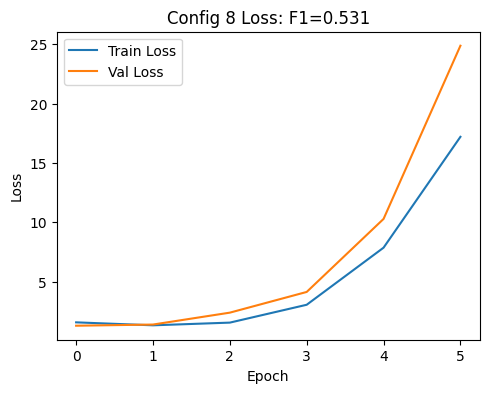

In [50]:
# Config 8
config = hyperparameter_configs[7]
print(f"\n--- Training Model with Configuration 8: {config} ---")
model = build_cnn_model(**config, input_shape=input_shape, num_classes=num_classes)
model.summary()
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping], verbose=1)
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Config 8 - Test Macro F1-Score: {macro_f1:.4f}")
results.append({'config': config, 'history': history.history, 'macro_f1': macro_f1})
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f"Config 8 Loss: F1={macro_f1:.3f}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
if macro_f1 > best_f1_score:
    best_f1_score = macro_f1
    best_model_config = config
    best_keras_model = model
    print(f"New best model found with F1-score: {best_f1_score:.4f}")


--- Training Model with Configuration 9: {'num_conv_layers': 2, 'filters_per_layer': [32, 32], 'filter_size': (7, 7), 'pooling_type': 'max'} ---


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 32, 32, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 16, 16, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,506 (1.22 MB)

 Trainable params: 318,506 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.3267 - loss: 1.8393 - val_accuracy: 0.4298 - val_loss: 1.7308
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.3267 - loss: 1.8393 - val_accuracy: 0.4298 - val_loss: 1.7308
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.4487 - loss: 1.6534 - val_accuracy: 0.2699 - val_loss: 4.2979
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.4487 - loss: 1.6534 - val_accuracy: 0.2699 - val_loss: 4.2979
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4176 - loss: 2.5902 - val_accuracy: 0.3510 - val_loss: 6.8150
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4176 - loss: 2.5902 - val_accuracy: 0.3510 - val_loss: 6.8150
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.3760 - loss: 8.5683 - val_accuracy: 0.2964 - val_loss: 39.7902
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.3760 

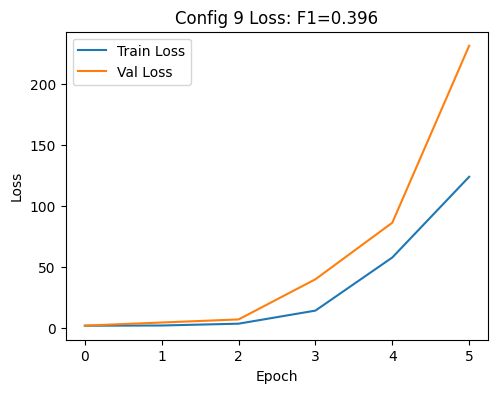

In [51]:
# Config 9
config = hyperparameter_configs[8]
print(f"\n--- Training Model with Configuration 9: {config} ---")
model = build_cnn_model(**config, input_shape=input_shape, num_classes=num_classes)
model.summary()
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping], verbose=1)
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Config 9 - Test Macro F1-Score: {macro_f1:.4f}")
results.append({'config': config, 'history': history.history, 'macro_f1': macro_f1})
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f"Config 9 Loss: F1={macro_f1:.3f}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
if macro_f1 > best_f1_score:
    best_f1_score = macro_f1
    best_model_config = config
    best_keras_model = model
    print(f"New best model found with F1-score: {best_f1_score:.4f}")


--- Training Model with Configuration 10: {'num_conv_layers': 2, 'filters_per_layer': [32, 32], 'filter_size': (3, 3), 'pooling_type': 'max'} ---


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273,706 (1.04 MB)

 Trainable params: 273,706 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3667 - loss: 1.7439 - val_accuracy: 0.5553 - val_loss: 1.2743
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3667 - loss: 1.7439 - val_accuracy: 0.5553 - val_loss: 1.2743
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5465 - loss: 1.2799 - val_accuracy: 0.5811 - val_loss: 1.2318
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5465 - loss: 1.2799 - val_accuracy: 0.5811 - val_loss: 1.2318
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5504 - loss: 1.3722 - val_accuracy: 0.5110 - val_loss: 1.7839
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5504 - loss: 1.3722 - val_accuracy: 0.5110 - val_loss: 1.7839
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5073 - loss: 2.1218 - val_accuracy: 0.4035 - val_loss: 4.6197
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5073 -

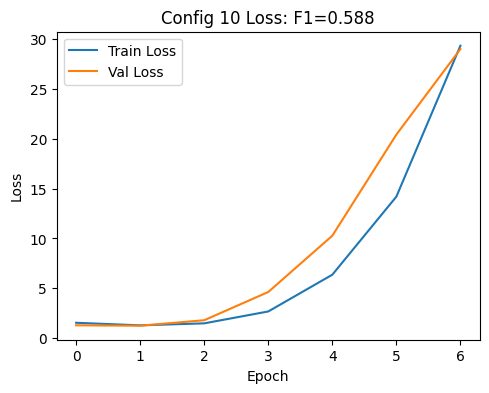

In [52]:
# Config 10
config = hyperparameter_configs[9]
print(f"\n--- Training Model with Configuration 10: {config} ---")
model = build_cnn_model(**config, input_shape=input_shape, num_classes=num_classes)
model.summary()
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping], verbose=1)
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Config 10 - Test Macro F1-Score: {macro_f1:.4f}")
results.append({'config': config, 'history': history.history, 'macro_f1': macro_f1})
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f"Config 10 Loss: F1={macro_f1:.3f}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
if macro_f1 > best_f1_score:
    best_f1_score = macro_f1
    best_model_config = config
    best_keras_model = model
    print(f"New best model found with F1-score: {best_f1_score:.4f}")


--- Training Model with Configuration 11: {'num_conv_layers': 2, 'filters_per_layer': [32, 32], 'filter_size': (3, 3), 'pooling_type': 'avg'} ---


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 16, 16, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 8, 8, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273,706 (1.04 MB)

 Trainable params: 273,706 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.3648 - loss: 1.7525 - val_accuracy: 0.5138 - val_loss: 1.3561
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.3648 - loss: 1.7525 - val_accuracy: 0.5138 - val_loss: 1.3561
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5025 - loss: 1.4314 - val_accuracy: 0.4210 - val_loss: 2.2213
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5025 - loss: 1.4314 - val_accuracy: 0.4210 - val_loss: 2.2213
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3894 - loss: 4.2970 - val_accuracy: 0.3449 - val_loss: 18.8482
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3894 - loss: 4.2970 - val_accuracy: 0.3449 - val_loss: 18.8482
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.2780 - loss: 39.9892 - val_accuracy: 0.2480 - val_loss: 94.7809
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.27

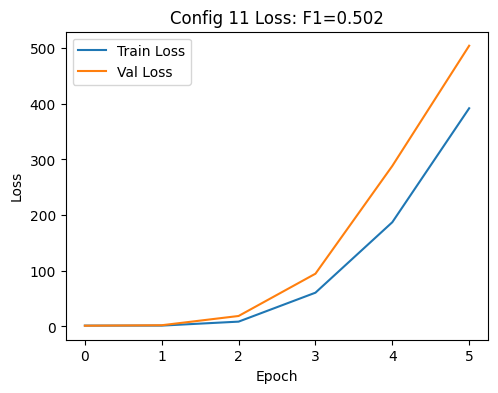

In [53]:
# Config 11
config = hyperparameter_configs[10]
print(f"\n--- Training Model with Configuration 11: {config} ---")
model = build_cnn_model(**config, input_shape=input_shape, num_classes=num_classes)
model.summary()
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping], verbose=1)
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Config 11 - Test Macro F1-Score: {macro_f1:.4f}")
results.append({'config': config, 'history': history.history, 'macro_f1': macro_f1})
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f"Config 11 Loss: F1={macro_f1:.3f}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
if macro_f1 > best_f1_score:
    best_f1_score = macro_f1
    best_model_config = config
    best_keras_model = model
    print(f"New best model found with F1-score: {best_f1_score:.4f}")


--- Best Model Configuration ---
{'num_conv_layers': 2, 'filters_per_layer': [32, 32], 'filter_size': (3, 3), 'pooling_type': 'max'}
Best Test Macro F1-Score: 0.5958
Saved best Keras model weights to cnn_keras.weights.h5

Re-training the best model for more epochs (up to 100)...


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_29 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273,706 (1.04 MB)

 Trainable params: 273,706 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.3694 - loss: 1.7242 - val_accuracy: 0.5497 - val_loss: 1.2644
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.3694 - loss: 1.7242 - val_accuracy: 0.5497 - val_loss: 1.2644
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5536 - loss: 1.2726 - val_accuracy: 0.5292 - val_loss: 1.4048
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5536 - loss: 1.2726 - val_accuracy: 0.5292 - val_loss: 1.4048
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5549 - loss: 1.4329 - val_accuracy: 0.4924 - val_loss: 2.1125
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5549 - loss: 1.4329 - val_accuracy: 0.4924 - val_loss: 2.1125
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4938 - loss: 2.7143 - val_accuracy: 0.4442 - val_loss: 5.3841
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 

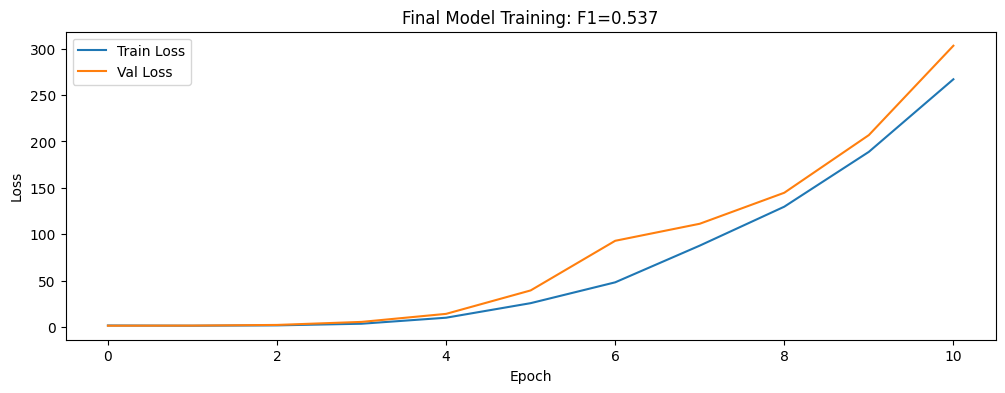

In [56]:
# Summary and best model logic
print(f"\n--- Best Model Configuration ---")
print(best_model_config)
print(f"Best Test Macro F1-Score: {best_f1_score:.4f}")

if best_keras_model and best_model_config:
    best_keras_model.save_weights('cnn_keras.weights.h5')
    print("Saved best Keras model weights to cnn_keras.weights.h5")
    print("\nRe-training the best model for more epochs (up to 100)...")
    
    # Create a new early stopping callback for final training with more patience
    final_early_stopping = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,  # More patience for final training
        restore_best_weights=True,
        verbose=1
    )
    
    final_model = build_cnn_model(**best_model_config, input_shape=input_shape, num_classes=num_classes)
    final_model.summary()
    final_history = final_model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[final_early_stopping], verbose=1)
    final_y_pred_proba = final_model.predict(x_test)
    final_y_pred = np.argmax(final_y_pred_proba, axis=1)
    final_macro_f1 = f1_score(y_test, final_y_pred, average='macro')
    print(f"Final Model Test Macro F1-Score after extended training: {final_macro_f1:.4f}")
    final_model.save_weights('cnn_keras_final.weights.h5')
    print("Saved final Keras model weights to cnn_keras_final.weights.h5")
    
    # Save the best model configuration to a file for testing script
    import json
    config_dict = {
        'num_conv_layers': best_model_config['num_conv_layers'],
        'filters_per_layer': best_model_config['filters_per_layer'],
        'filter_size': best_model_config['filter_size'],
        'pooling_type': best_model_config['pooling_type'],
        'final_f1_score': final_macro_f1
    }
    with open('best_model_config.json', 'w') as f:
        json.dump(config_dict, f, indent=2)
    print("Saved best model configuration to best_model_config.json")
    
    plt.figure(figsize=(12, 4))
    plt.plot(final_history.history['loss'], label='Train Loss')
    plt.plot(final_history.history['val_loss'], label='Val Loss')
    plt.title(f"Final Model Training: F1={final_macro_f1:.3f}")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
else:
    print("No model was trained successfully to save weights.")